In [1]:
#import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline


In [2]:
#import data here 

train_data = pd.read_csv('./train_noclean3.csv')
test_data = pd.read_csv('./test_noclean3.csv')


In [3]:

y_train = train_data.loc[:,'price']
train_data = train_data.drop(columns='price')
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features])
X_train = train_data.loc[:,features]

features = list(test_data.columns[2:num_features])

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']
print(X_train.head(5))
print(X_train.shape)
print(X_test.shape)
print(y_train)
test_labels = test_labels.to_frame()

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0               1                170          205               2.48   
1               1                 11          197               0.57   
2               3                  2         1911               0.08   
3               2                  1         1911               0.13   
4               2                 31         1912               1.54   

   calculated_host_listings_count  availability_365  host_since  \
0                               4               346          13   
1                               1                 0          14   
2                              19               360          17   
3                               1               267          19   
4                               5               365          15   

   host_is_superhost  bathrooms  bedrooms  ...  guests_included  extra_people  \
0              False        1.0         0  ...                1             0   
1 

In [4]:
print(X_train.nunique())
print(X_train['host_since'].value_counts())

minimum_nights                         48
number_of_reviews                     248
last_review                            82
reviews_per_month                     504
calculated_host_listings_count         47
availability_365                      361
host_since                             13
host_is_superhost                       2
bathrooms                              18
bedrooms                               13
beds                                   18
cleaning_fee                          589
guests_included                        14
extra_people                          348
maximum_nights                        168
Da_hood_1                               2
Da_hood_2                               2
Da_hood_15                              2
Cancel_flexible                         2
Cancel_strict_14_with_grace_period      2
Room_Entire home/apt                    2
Room_Private room                       2
dtype: int64
16    1550
15    1269
14    1217
18    1171
17    1085
19     9

In [5]:

dtest = xgb.DMatrix(X_test)

In [6]:
def run_model(X_train, y_train, dtest, max_depth, n, eta, gamma):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    watchlist = [(dtest, 'eval')]
    param = {'max_depth':max_depth, 'objective':'multi:softmax', 'eta':eta, 'gamma':gamma, 'num_class':5, 'eval_metric': 'merror'}
    num_round = n
    bst = xgb.train(param, dtrain, num_round, early_stopping_rounds = 50, evals = watchlist, verbose_eval = False)
    return bst

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

list_max_depth = list(np.arange(1, 10))

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
depth_average = []
depth_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for max_depth in list_max_depth: 
    print(max_depth)
    i=0
    accuracy_depth = []
    for train, test in kf.split(X_train):
        i+=1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, max_depth, 100, 0.1, 1)
        #X_train, y_train, dtest, 9, 300, 0.1, 1
        ypred_test_kf = bst.predict(dtest_kf)
        
        accuracy_depth.append(accuracy_score(y_test_kf, ypred_test_kf))
    depth_average.append(np.mean(accuracy_depth))
    depth_std.append(np.std(accuracy_depth))
    print(np.mean(accuracy_depth))
    print(np.std(accuracy_depth))
    
    

1
1
2
3
4
5
6
7
8
9
10
0.5044951342868597
0.018464273964606672
2
1
2
3
4
5
6
7
8
9
10
0.5199874839017816
0.016350328847050517
3
1
2
3
4
5
6
7
8
9
10
0.5358970012537421
0.017138323201628773
4
1
2
3
4
5
6
7
8
9
10
0.5359967888851931
0.020584907336358944
5
1
2
3
4
5
6
7
8
9
10
0.5370308062328889
0.010472363138875724
6
1
2
3
4
5
6
7
8
9
10
0.547048588900545
0.016493930275594478
7
1
2
3
4
5
6
7
8
9
10
0.5474617054303235
0.010565719126553028
8
1
2
3
4
5
6
7
8
9
10
0.5495273946899334
0.013227806211090066
9
1
2
3
4
5
6
7
8
9
10
0.5472574392958576
0.022349783646194495


In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

list_max_depth = [10,15,20,30]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
depth_average = []
depth_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for max_depth in list_max_depth: 
    print(max_depth)
    i=0
    accuracy_depth = []
    for train, test in kf.split(X_train):
        i+=1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, max_depth, 500, 0.05, 3)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        accuracy_depth.append(accuracy_score(y_test_kf, ypred_test_kf))
    depth_average.append(np.mean(accuracy_depth))
    depth_std.append(np.std(accuracy_depth))
    print(np.mean(accuracy_depth))
    print(np.std(accuracy_depth))
    
    

10
1
2
3
4
5
0.545088095248254
0.011251335083946027
15
1
2
3
4
5
0.5392014254811692
0.006267910851753299
20
1
2
3
4
5
0.541472606100428
0.009038964405051367
30
1
2
3
4
5
0.5397173144122503
0.010806858954068998


In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

eta_list = [0.01,0.03,0.05,0.08,0.1,0.15,0.2,0.3]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
eta_average = []
eta_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for eta in eta_list: 
    eta_acc = []
    print(eta)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 8, 100, eta, 3)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        eta_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    eta_average.append(np.mean(eta_acc))
    eta_std.append(np.std(eta_acc))
    print(np.mean(eta_acc))
    print(np.std(eta_acc))
    
    

0.01
1
2
3
4
5
0.5342423744650712
0.0037946776976774325
0.03
1
2
3
4
5
0.5387880423420387
0.00673100577829454
0.05
1
2
3
4
5
0.5374466671217739
0.011804316163591724
0.08
1
2
3
4
5
0.5348628491703538
0.008107279696893645
0.1
1
2
3
4
5
0.537754771159286
0.0063962672028789625
0.15
1
2
3
4
5
0.539098066363167
0.01085398248586026
0.2
1
2
3
4
5
0.5330037183682699
0.0063934341993735905
0.3
1
2
3
4
5
0.5385806307786174
0.00641269805835339


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

gamma_list = [0.1, 0.5, 1, 2, 3, 5, 10, 20]

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
gamma_average = []
gamma_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for gamma in gamma_list: 
    gamma_acc = []
    print(gamma)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 8, 100, 0.1, gamma)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        gamma_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    gamma_average.append(np.mean(gamma_acc))
    gamma_std.append(np.std(gamma_acc))
    print(np.mean(gamma_acc))
    print(np.std(gamma_acc))
    
    

0.1
1
2
3
4
5
6
7
8
9
10
0.5438509070439834
0.020503405923471392
0.5
1
2
3
4
5
6
7
8
9
10
0.5464326987863435
0.01221079423423243
1
1
2
3
4
5
6
7
8
9
10
0.5492209954882344
0.012399667960275767
2
1
2
3
4
5
6
7
8
9
10
0.5454999616201417
0.012415978214832707
3
1
2
3
4
5
6
7
8
9
10
0.545398788049365
0.015713551908686493
5
1
2
3
4
5
6
7
8
9
10
0.5380637574734113
0.012926143757371876
10
1
2
3
4
5
6
7
8
9
10
0.5242237673668859
0.016112067888742993
20
1
2
3
4
5
6
7
8
9
10
0.5053205144606776
0.016622236397701218


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

num_list = [50, 100, 150, 200, 300, 500, 1000]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
num_average = []
num_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for num in num_list: 
    num_acc = []
    print(num)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 6, num, 0.1, 0.5)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        num_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    num_average.append(np.mean(num_acc))
    num_std.append(np.std(num_acc))
    print(np.mean(num_acc))
    print(np.std(num_acc))
    
    

50
1
2
3
4
5
0.5398204068658614
0.013119023660897594
100
1
2
3
4
5
0.548187322134851
0.01027896037010398
150
1
2
3
4
5
0.5451930010197247
0.013458828609971623
200
1
2
3
4
5
0.5471538376205857
0.009699389469120485
300
1
2
3
4
5
0.5430230995362172
0.012115290962221392
500
1
2
3
4
5
0.5433320035669029
0.0038769561928930873
1000
1
2
3
4
5
0.5412654612013977
0.007486748557180634


In [ ]:
print(num_average)
print(num_std)

In [12]:
print(gamma_average)
print(gamma_std)

[0.5385796707868094, 0.5471528776287776, 0.5424027848295695, 0.5472577834002483, 0.5359978794847617, 0.5304210737401707, 0.5191604231643889, 0.49705506513011083]
[0.009008566400556766, 0.008057757232183735, 0.005089394761086707, 0.0036263727018859045, 0.0072575091340615055, 0.014293571159982687, 0.0070079319988740054, 0.007057881211073362]


In [ ]:
print(eta_average)
print(eta_std)

In [ ]:
print(depth_average)
print(depth_std)

In [13]:
def run_model2(X_train, y_train, dtest, max_depth, n, eta, gamma):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    param = {'max_depth':max_depth, 'objective':'multi:softmax', 'eta':eta, 'gamma':gamma, 'num_class':5, 'eval_metric': 'merror'}
    num_round = n
    bst = xgb.train(param, dtrain, num_round)
    return bst

In [14]:
bst = run_model2(X_train, y_train, dtest, 8, 100, 0.1, 1)

In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
ypred_train = bst.predict(dtrain)
print(ypred_train)

[3. 1. 3. ... 3. 3. 1.]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, ypred_train)

0.8648899907034397

In [17]:
ypred_test = bst.predict(dtest)

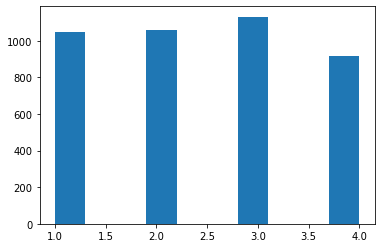

In [18]:
plt.figure()
plt.hist(ypred_test)
plt.show()


In [20]:
df = pd.DataFrame
test_labels['price'] = ypred_test
test_labels['price'] = test_labels['price'].map(lambda x: int(x))

In [21]:
test_labels

,id,price
0,7715,2
1,13196,2
2,13194,2
3,4673,2
4,11325,2
...,...,...
4144,12921,2
4145,7174,1
4146,9240,3
4147,11663,1


In [19]:
test_labels.to_csv(r'./submission6.csv', index=False)

In [7]:
def run_model2(X_train, y_train, dtest, max_depth, n, eta, gamma):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    param = {'max_depth':max_depth, 'objective':'multi:softmax', 'eta':eta, 'gamma':gamma, 'num_class':5, 'eval_metric':'merror'}
    num_round = n
    xgtrain = xgb.DMatrix(X_train, label=y_train)
    watchlist = [ (xgtrain,'train'),(dtest,'eval')]
    bst = xgb.train(param, xgtrain, num_round, watchlist,  early_stopping_rounds=10 , verbose_eval = False)
    return bst

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
accuracy = []
std = []
kf = KFold(n_splits = 10, shuffle=True)
#print(features)
y = np.concatenate([y_train], axis= 0)
for feature in features:
    X_train = train_data.loc[:,feature]
    X = np.concatenate([X_train], axis= 0)
    X = np.reshape(X, (len(X), 1))
    accuracy_feature = []
    for train, test in kf.split(X_train):
        X_train_kf, X_test_kf = X[train],X[test]
        
        y_train_kf, y_test_kf = y[train],y[test]
        
        #print(len(y_test_kf))
        #print(len(X_test_kf))
        #print(X_test_kf)
        
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model2(X_train_kf, y_train_kf, dtest_kf, 9, 300, 0.1, 1)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        accuracy_feature.append(accuracy_score(y_test_kf, ypred_test_kf))
    print(feature, np.mean(accuracy_feature))
    accuracy.append(np.mean(accuracy_feature))
    std.append(np.mean(accuracy_feature))
#bst = run_model(X_train, y_train, dtest, 9, 300, 0.1, 1)



minimum_nights 0.28137436140180305
number_of_reviews 0.25916670931095365
last_review 0.28313023991675834
reviews_per_month 0.28168353248215333
calculated_host_listings_count 0.2986231225852673
availability_365 0.31370587382408377
host_since 0.3114327201084871
host_is_superhost 0.2712526332847188
bathrooms 0.3429401316855581
bedrooms 0.36907169783964044
beds 0.350791477965697
bed_type 0.254207391960699
cleaning_fee 0.4400377615160897
guests_included 0.31660024818975
extra_people 0.3083380242048973
maximum_nights 0.28963743827239463
instant_bookable 0.25472392088631884
Da_hood_1 0.30802672091019967
Da_hood_2 0.26856881508584296
Da_hood_3 0.25472573326851405
Da_hood_15 0.3076123250518128
Cancel_flexible 0.2779652704927121
Cancel_moderate 0.24202040102687442
Cancel_strict_14_with_grace_period 0.2840622308079387
Cancel_super_strict_30 0.25647947956912215
Room_Entire home/apt 0.34417798872485056
Room_Private room 0.3376712168120837
